# Hyperparameters tuning

In [1]:
import numpy as np 
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from tqdm.notebook import tqdm

## 1. Loading the sample data

In [2]:
sample_df = pd.read_pickle("./training-data.pkl")

In [3]:
inputs = np.vstack(sample_df['pca_array'])
targets = sample_df['target'].to_numpy()

## 2. Split into train and test split

In [4]:
X_train, X_test, y_train, y_test =  train_test_split(inputs, targets, train_size=0.7, shuffle = True)

## 3. Tuning models

### 3.1. Random Forest Classifier

In [5]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [6]:
RFC = RandomForestClassifier(n_estimators = 200, verbose = True)

In [7]:
RFC.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   34.2s finished


RandomForestClassifier(n_estimators=200, verbose=True)

In [8]:
y_pred = RFC.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [9]:
RFC_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(RFC_accuracy))

Accuracy: 78.45%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


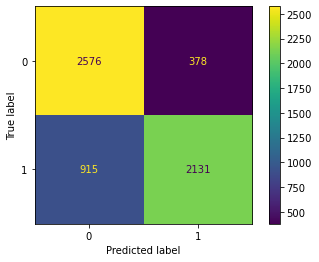

In [10]:
plot_confusion_matrix(RFC, X_test, y_test)  
plt.show()  

In [11]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300, 1000]
}

In [12]:
RFC = RandomForestClassifier()

In [13]:
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, scoring = 'accuracy', verbose = 10, n_jobs = -1)

In [15]:
init_time = datetime.now() 

grid_search.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed: 18.3min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 21.3min finished


0:24:06.899729


In [16]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [19]:
RFC_best = RandomForestClassifier(bootstrap = None, max_depth = None, min_samples_leaf = 3, min_samples_split = 10, n_estimators = 1000)

In [20]:
RFC_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=None, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=1000)

In [22]:
y_pred_best = RFC_best.predict(X_test)
RFC_best_accuracy = metrics.accuracy_score(y_test, y_pred_best)
print("Accuracy: {:2.2%}".format(RFC_best_accuracy))

Accuracy: 79.67%


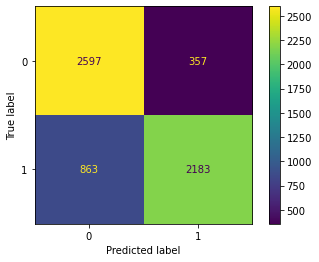

In [23]:
plot_confusion_matrix(RFC_best, X_test, y_test)  
plt.show() 

In [25]:
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [None],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [10, 12],
    'n_estimators': [200, 600, 1000]
}

In [26]:
RFC = RandomForestClassifier()

In [27]:
grid_search2 = GridSearchCV(estimator = RFC, param_grid = param_grid2, scoring = 'accuracy', verbose = 10, n_jobs = -1)

In [28]:
init_time = datetime.now() 

grid_search2.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed: 18.2min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 22.3min finished


0:25:01.806103


In [29]:
grid_search2.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 1000}

In [34]:
RFC_best_2 = RandomForestClassifier(bootstrap = None, max_depth = None, min_samples_leaf = 3, min_samples_split = 12, n_estimators = 1000)

In [35]:
init_time = datetime.now() 
RFC_best_2.fit(X_train, y_train)
print(datetime.now() - init_time)

0:04:44.766828


In [36]:
y_pred_best_2 = RFC_best_2.predict(X_test)
RFC_best_accuracy_2 = metrics.accuracy_score(y_test, y_pred_best_2)
print("Accuracy: {:2.2%}".format(RFC_best_accuracy_2))

Accuracy: 79.65%


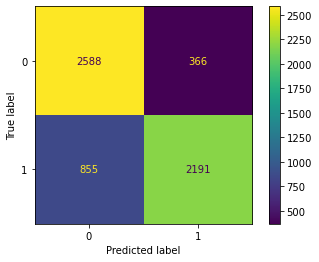

In [37]:
plot_confusion_matrix(RFC_best_2, X_test, y_test)  
plt.show() 

In [38]:
RFC = RandomForestClassifier()

### 3.2. K-Nearest Neighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KNC = KNeighborsClassifier()

In [46]:
KNC.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred = KNC.predict(X_test)
KNC_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(KNC_accuracy))

Accuracy: 77.52%


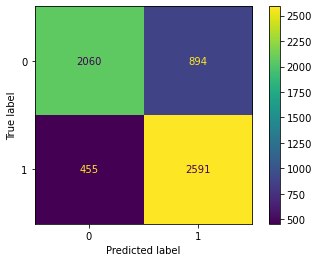

In [48]:
plot_confusion_matrix(KNC, X_test, y_test)  
plt.show() 

In [69]:
KNC = KNeighborsClassifier()

In [70]:
param_grid_KNC = {
    'n_neighbors': [5,10, 20],
    'leaf_size': [20,30,40],
    'p': [1,2],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'chebyshev']
}

In [71]:
grid_search_KNC = GridSearchCV(estimator = KNC, param_grid = param_grid_KNC, scoring = 'accuracy', verbose = 10, n_jobs = -1)

In [72]:
init_time = datetime.now() 

grid_search_KNC.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  7

0:12:18.885639


In [73]:
grid_search_KNC.best_params_

{'leaf_size': 20,
 'metric': 'chebyshev',
 'n_neighbors': 20,
 'p': 1,
 'weights': 'uniform'}

In [74]:
KNC_best = grid_search_KNC.best_estimator_

In [75]:
init_time = datetime.now() 
KNC_best.fit(X_train, y_train)
print(datetime.now() - init_time)

0:00:00.887846


In [76]:
y_pred = KNC_best.predict(X_test)
KNC_accuracy_best = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(KNC_accuracy_best))

Accuracy: 79.17%


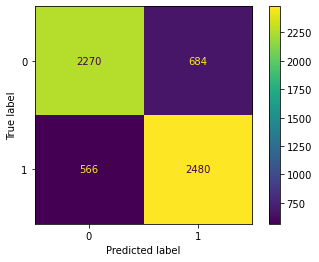

In [77]:
plot_confusion_matrix(KNC_best, X_test, y_test)  
plt.show() 

### 3.3. Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
DTC = DecisionTreeClassifier()

In [80]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
y_pred = DTC.predict(X_test)
DTC_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(DTC_accuracy))

Accuracy: 71.75%


In [84]:
DTC = DecisionTreeClassifier()

In [85]:
param_grid_DTC = {
    'max_leaf_nodes': [2,4,8,10,20,30,50,100],
    'min_samples_split': [2, 3, 4]
}

In [86]:
grid_search_DTC = GridSearchCV(estimator = DTC, param_grid = param_grid_DTC, scoring = 'accuracy', verbose = 10, n_jobs = -1)

In [87]:
init_time = datetime.now() 

grid_search_DTC.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   36.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   36.9s finished


0:00:38.978051


In [88]:
grid_search_DTC.best_params_

{'max_leaf_nodes': 30, 'min_samples_split': 2}

In [89]:
DTC_best = grid_search_DTC.best_estimator_

In [90]:
init_time = datetime.now() 
DTC_best.fit(X_train, y_train)
print(datetime.now() - init_time)

0:00:01.865134


In [91]:
y_pred = DTC_best.predict(X_test)
DTC_accuracy_best = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(DTC_accuracy_best))

Accuracy: 78.72%


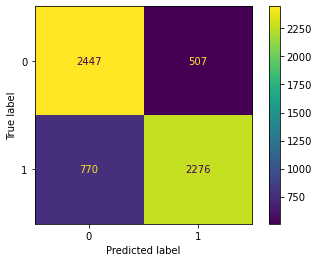

In [92]:
plot_confusion_matrix(DTC_best, X_test, y_test)  
plt.show() 

### 3.4. MLP Classifier

In [93]:
from sklearn.neural_network import MLPClassifier

In [94]:
MLP = MLPClassifier()

In [95]:
MLP.fit(X_train, y_train)

MLPClassifier()

In [96]:
y_pred = MLP.predict(X_test)
MLP_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(MLP_accuracy))

Accuracy: 70.03%


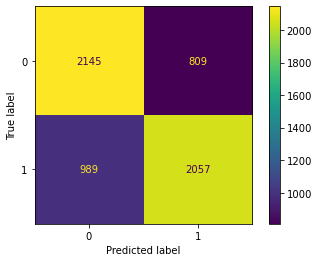

In [98]:
plot_confusion_matrix(MLP, X_test, y_test)  
plt.show() 

In [101]:
MLP = MLPClassifier()

In [102]:
param_grid_MLP = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [103]:
grid_search_MLP = GridSearchCV(estimator = MLP, param_grid = param_grid_MLP, scoring = 'accuracy', verbose = 10, n_jobs = -1)

In [104]:
init_time = datetime.now() 

grid_search_MLP.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  5.6min finished


0:05:37.394886


In [105]:
grid_search_MLP.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'constant',
 'solver': 'sgd'}

In [106]:
MLP_best = grid_search_MLP.best_estimator_

In [107]:
init_time = datetime.now() 
MLP_best.fit(X_train, y_train)
print(datetime.now() - init_time)

0:00:04.250655


In [108]:
y_pred = MLP_best.predict(X_test)
MLP_accuracy_best = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(MLP_accuracy_best))

Accuracy: 76.48%


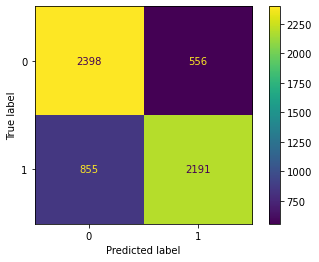

In [109]:
plot_confusion_matrix(MLP_best, X_test, y_test)  
plt.show() 

### 3.5. Support Vector Classification

In [24]:
from sklearn.svm import SVC as SupportVectorClassifier

In [25]:
SVC = SupportVectorClassifier(kernel = 'rbf', C = 1.0, gamma = 'scale')

In [26]:
SVC.fit(X_train, y_train)

SVC()

In [27]:
y_pred = SVC.predict(X_test)
SVC_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(SVC_accuracy))

Accuracy: 81.75%


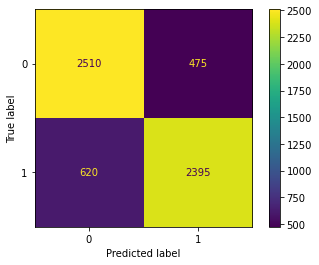

In [28]:
plot_confusion_matrix(SVC, X_test, y_test)  
plt.show() 

In [12]:
SVC = SupportVectorClassifier()

In [119]:
param_grid_SVC = [{'kernel': ['rbf'], 'gamma': ['scale', 'auto'],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [29]:
param_grid_SVC = {'kernel': ['rbf'], 'gamma': ['scale', 'auto'],
                     'C': [1, 10]}

In [30]:
grid_search_SVC = GridSearchCV(estimator = SVC, param_grid = param_grid_SVC, scoring = 'accuracy', verbose = 10, n_jobs = -1)

In [31]:
init_time = datetime.now() 

grid_search_SVC.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:  2.5min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  3.4min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:  4.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  6.6min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.8min finished


0:07:17.413049


In [32]:
grid_search_SVC.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [33]:
SVC_best = grid_search_SVC.best_estimator_

In [34]:
init_time = datetime.now() 
SVC_best.fit(X_train, y_train)
print(datetime.now() - init_time)

0:00:32.116995


In [35]:
y_pred = SVC_best.predict(X_test)
SVC_accuracy_best = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(SVC_accuracy_best))

Accuracy: 81.75%


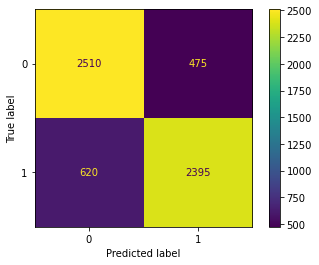

In [36]:
plot_confusion_matrix(SVC_best, X_test, y_test)  
plt.show() 

### 3.6. Linear Stochastic Gradient Descent

In [159]:
from sklearn.linear_model import SGDClassifier

In [61]:
SGD = SGDClassifier()

In [62]:
SGD.fit(X_train, y_train)

SGDClassifier()

In [63]:
y_pred = SGD.predict(X_test)
SGD_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(SGD_accuracy))

Accuracy: 72.92%


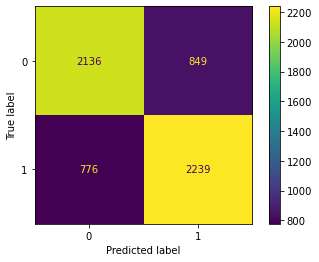

In [64]:
plot_confusion_matrix(SGD, X_test, y_test)  
plt.show() 

In [66]:
SGD = SGDClassifier()

In [67]:
param_grid_SGD = {
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}

In [68]:
grid_search_SGD = GridSearchCV(estimator = SGD, param_grid = param_grid_SGD, scoring = 'accuracy', verbose = 10, n_jobs = -1)

In [69]:
init_time = datetime.now() 

grid_search_SGD.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

0:01:33.043791


In [75]:
grid_search_SGD.best_params_

{'alpha': 1, 'l1_ratio': 0.05}

In [76]:
SGD_best = grid_search_SGD.best_estimator_

In [77]:
init_time = datetime.now() 
SGD_best.fit(X_train, y_train)
print(datetime.now() - init_time)

0:00:01.121002


In [78]:
y_pred = SGD_best.predict(X_test)
SGD_accuracy_best = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(SGD_accuracy_best))

Accuracy: 75.02%


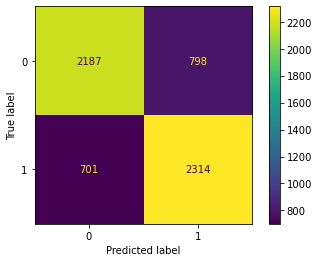

In [79]:
plot_confusion_matrix(SGD_best, X_test, y_test)  
plt.show() 

### 3.7. Nearest Centroid Classifier

In [89]:
from sklearn.neighbors import NearestCentroid

In [90]:
NCC = NearestCentroid()

In [91]:
init_time = datetime.now() 

NCC.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

0:00:00.018950


In [92]:
y_pred = NCC.predict(X_test)
NCC_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(NCC_accuracy))

Accuracy: 73.15%


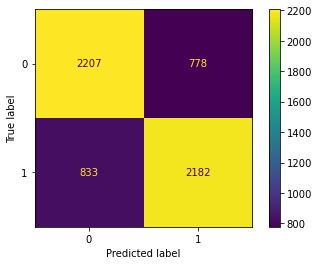

In [93]:
plot_confusion_matrix(NCC, X_test, y_test)  
plt.show() 

### 3.8. Naive Bayes Classifier

In [151]:
from sklearn.naive_bayes import GaussianNB

In [105]:
NBC = GaussianNB()

In [109]:
init_time = datetime.now() 

NBC.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

0:00:00.058857


In [107]:
y_pred = NBC.predict(X_test)
NBC_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(NBC_accuracy))

Accuracy: 60.17%


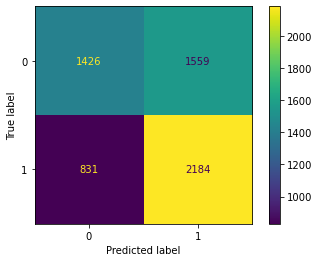

In [110]:
plot_confusion_matrix(NBC, X_test, y_test)  
plt.show() 

### 3.9. Gradient Boosting Classifier

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
GBC = GradientBoostingClassifier()

In [ ]:
init_time = datetime.now() 

GBC.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

In [118]:
y_pred = GBC.predict(X_test)
GBC_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(GBC_accuracy))

Accuracy: 81.38%


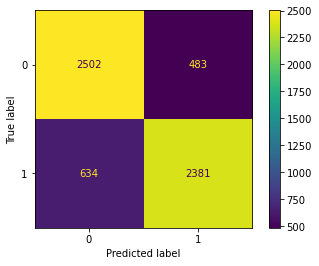

In [131]:
plot_confusion_matrix(GBC, X_test, y_test)  
plt.show() 

In [7]:
param_grid_GBC = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 2),
    "min_samples_leaf": np.linspace(0.1, 0.5, 2),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 1.0],
    "n_estimators":[100]
    }

In [8]:
grid_search_GBC = GridSearchCV(estimator = GBC, param_grid = param_grid_GBC, scoring = 'accuracy', verbose = 10, n_jobs = -1)

In [9]:
init_time = datetime.now() 

grid_search_GBC.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

0:05:30.759667


In [15]:
grid_search_GBC.best_params_

{'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

In [16]:
GBC_best = grid_search_GBC.best_estimator_

In [17]:
init_time = datetime.now() 
GBC_best.fit(X_train, y_train)
print(datetime.now() - init_time)

0:00:06.965196


In [18]:
y_pred = GBC_best.predict(X_test)
GBC_accuracy_best = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(GBC_accuracy_best))

Accuracy: 80.77%


In [ ]:
plot_confusion_matrix(GBC, X_test, y_test)  
plt.show() 

In [55]:
GBC = GradientBoostingClassifier()

In [81]:
param_try = {'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

In [117]:
GBC = GradientBoostingClassifier(learning_rate = 0.1,
                                loss = 'deviance',
                                max_depth = 10,
                                max_features = 'sqrt',
                                min_samples_leaf = 5,
                                min_samples_split = 0.05,
                                n_estimators = 300,
                                subsample = 1.0)

In [118]:
init_time = datetime.now() 
GBC.fit(X_train, y_train)
print(datetime.now() - init_time)
y_pred = GBC.predict(X_test)
GBC_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(GBC_accuracy))

0:00:47.238653
Accuracy: 81.17%


In [121]:
param_grid_GBC = {
    "loss":["deviance"],
    "learning_rate": [0.1],
    "min_samples_split": [0.05,0.1,1],
    "min_samples_leaf": [2,3,5],
    "max_depth":[3,10,15,30,50],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[1.0],
    "n_estimators":[100,200,300]
    }

In [122]:
grid_search_GBC = GridSearchCV(estimator = GBC, param_grid = param_grid_GBC, scoring = 'accuracy', verbose = 10, n_jobs = -1)

In [123]:
init_time = datetime.now() 

grid_search_GBC.fit(X_train, y_train)

final_time = datetime.now()

print(final_time - init_time)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3

1:25:14.964645


In [124]:
grid_search_GBC.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 0.05,
 'n_estimators': 100,
 'subsample': 1.0}

In [125]:
GBC_best = grid_search_GBC.best_estimator_

In [128]:
init_time = datetime.now() 
GBC_best.fit(X_train, y_train)
print(datetime.now() - init_time)

0:00:18.312859


In [129]:
y_pred = GBC_best.predict(X_test)
GBC_accuracy_best = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:2.2%}".format(GBC_accuracy_best))

Accuracy: 81.50%
